 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [438]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

C:\Users\aelri\Desktop\Pandas\Resources# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [439]:
# Reading whale returns
whale_returns= r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\whale_returns.csv"
whale_returnsdf= pd.read_csv(whale_returns,index_col= "Date", infer_datetime_format=True, parse_dates=True)
whale_returnsdf.sort_index(inplace=True)
whale_returnsdf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [440]:
# Count nulls
whale_returnsdf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [441]:
# Drop nulls
whale_returnsdf.dropna(inplace=True)
whale_returnsdf.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [442]:
# Reading algorithmic returns
algo_returns = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\algo_returns.csv"
algo_returnsdf= pd.read_csv(algo_returns,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returnsdf.sort_index(inplace=True)
algo_returnsdf.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [443]:
# Count nulls
algo_returnsdf.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [444]:
# Drop nulls
algo_returnsdf.dropna(inplace=True)
algo_returnsdf

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [445]:
# Reading S&P 500 Closing Prices
sp500_history = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\sp500_history.csv"
sp500_df= pd.read_csv(sp500_history,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [446]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [447]:
# Fix Data Types
sp500_df["Close"]=sp500_df["Close"].str.replace('$','').astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [448]:
# Calculate Daily Returns
sp500daily=sp500_df.pct_change()
sp500daily.sort_index(inplace=True)
sp500daily.head()

,Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [449]:
# Drop nulls
sp500daily.dropna(inplace=True)
sp500daily.head()

,Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [450]:
# Rename `Close` Column to be specific to this portfolio.
sp500daily.rename(columns={"Close":"S&P500"},inplace=True)
sp500daily.head()

,S&P500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [528]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns
portfolio=pd.concat([whale_returnsdf,algo_returnsdf,sp500daily],axis="columns",join="inner")
portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

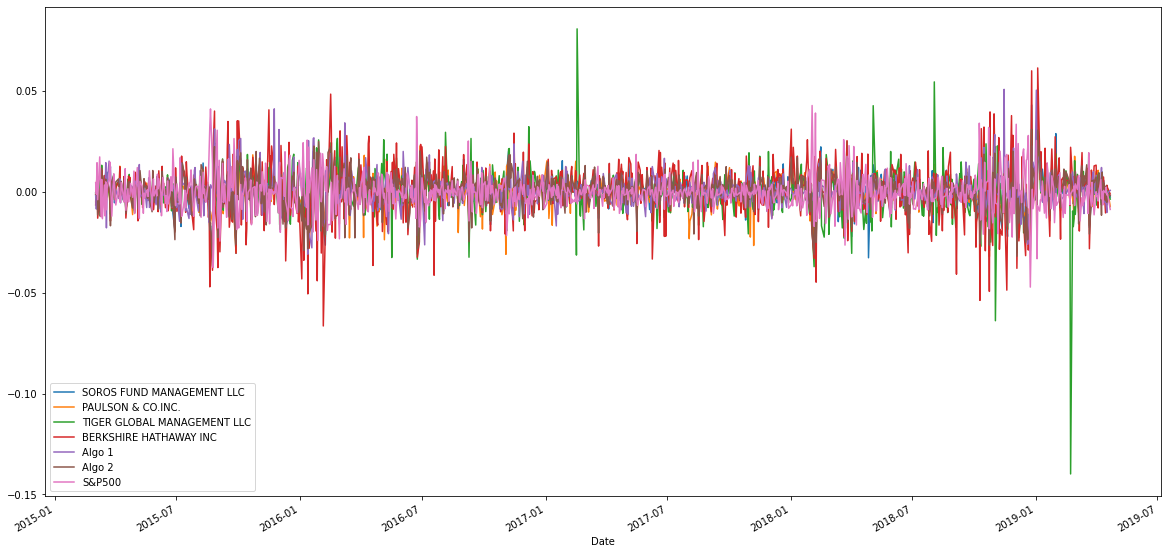

In [452]:
# Plot daily returns of all portfolios
portfolio.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

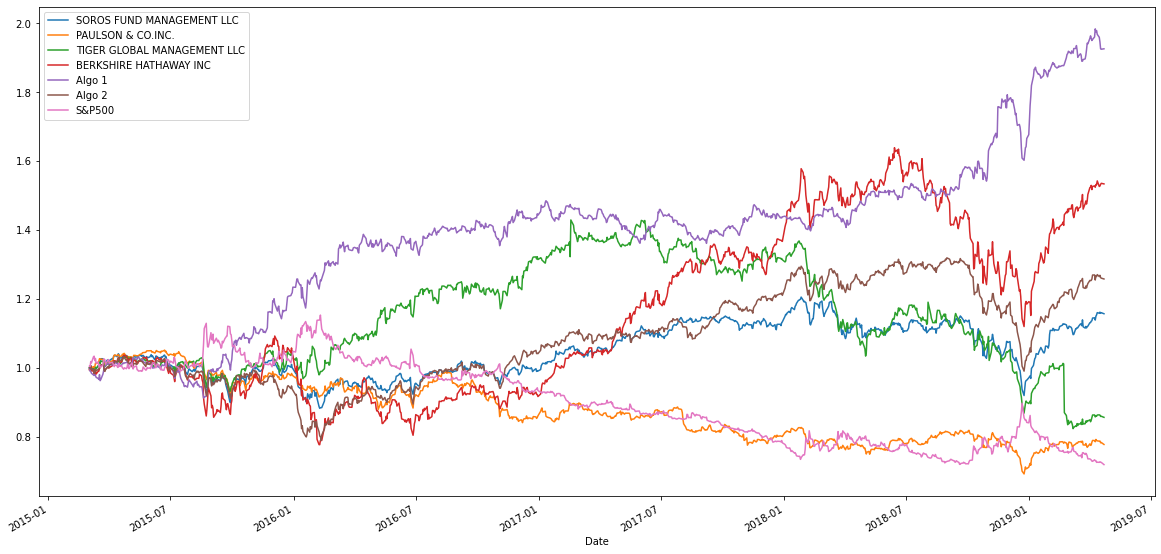

In [453]:
# Calculate cumulative returns of all portfolios
Cum_returns=(1+portfolio).cumprod()
# Plot cumulative returns
Cum_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

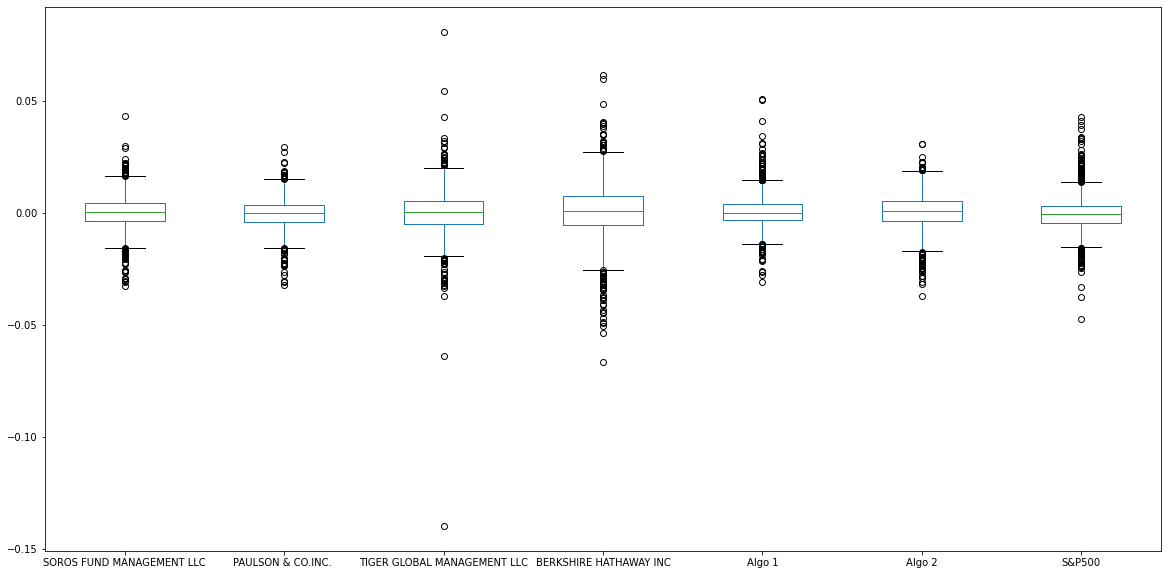

In [454]:
# Box plot to visually show risk
portfolio.plot(kind="box",figsize=(20,10))

### Calculate Standard Deviations

In [455]:
# Calculate the daily standard deviations of all portfolios
portfolio_std=pd.DataFrame(portfolio.std())
portfolio_std.rename(columns={0:"std"},inplace=True)
portfolio_std

,std
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
S&P500,0.008587


### Determine which portfolios are riskier than the S&P 500

In [456]:
# Determine which portfolios are riskier than the S&P 500
portfolio_std
riskier = portfolio_std[portfolio_std["std"] > portfolio_std.loc["S&P500","std"]]
print(riskier)

                                  std
TIGER GLOBAL MANAGEMENT LLC  0.010897
BERKSHIRE HATHAWAY INC       0.012919


### Calculate the Annualized Standard Deviation

In [457]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std=portfolio_std*np.sqrt(252)
annualised_std

,std
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
S&P500,0.136313


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

---

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

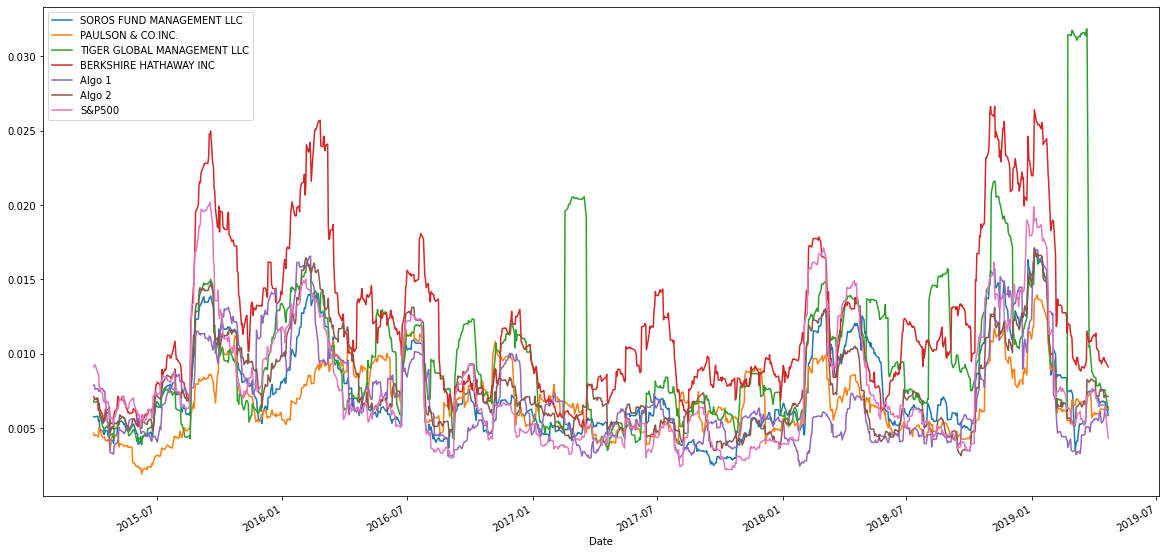

In [458]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = portfolio.rolling(window = 21).std()
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

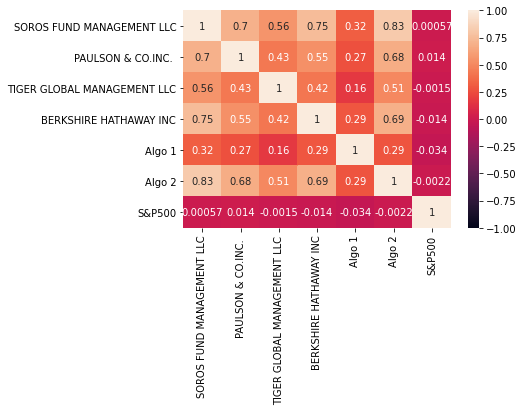

In [459]:
# Calculate the correlation
correlation=portfolio.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1, vmax=1,annot=True,)

In [460]:
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [461]:
# Calculate covariance of a single portfolio
covariance=portfolio['PAULSON & CO.INC. '].cov(portfolio["S&P500"])
covariance

8.173659005663558e-07

<AxesSubplot:xlabel='S&P500', ylabel='PAULSON & CO.INC. '>

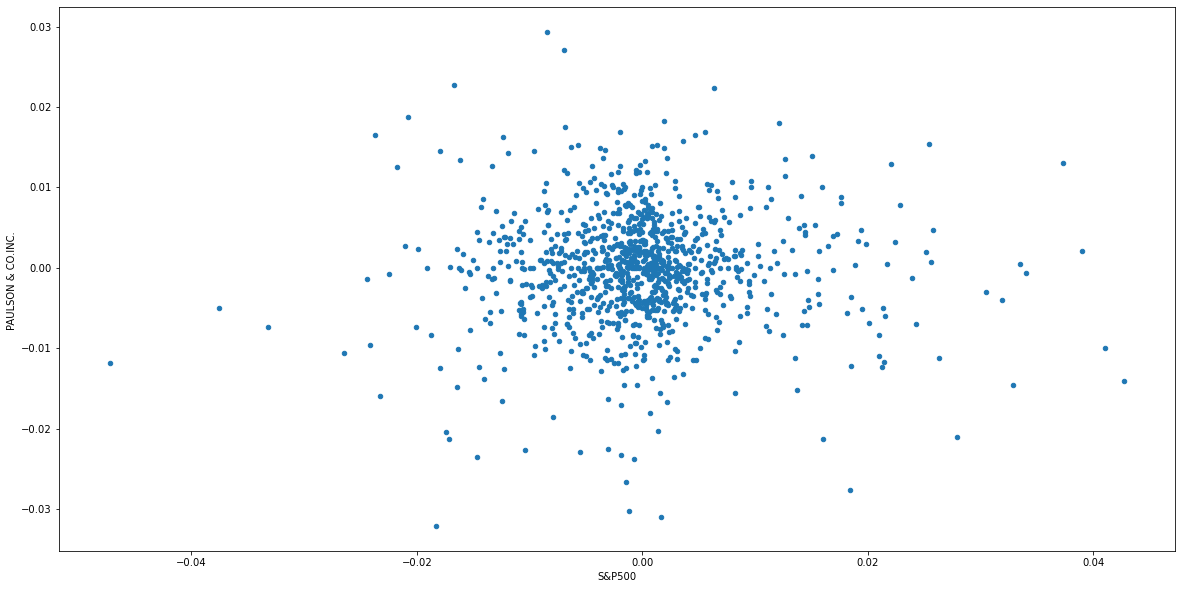

In [462]:

portfolio.plot(kind="scatter", y = 'PAULSON & CO.INC. ', x = "S&P500", figsize = (20,10))

In [463]:
# Calculate variance of S&P 500
variance=portfolio["S&P500"].var()
variance

7.373467552840441e-05

In [464]:
# Computing beta
algo2_beta=covariance/variance
algo2_beta

0.0110852308592785

<AxesSubplot:xlabel='Date'>

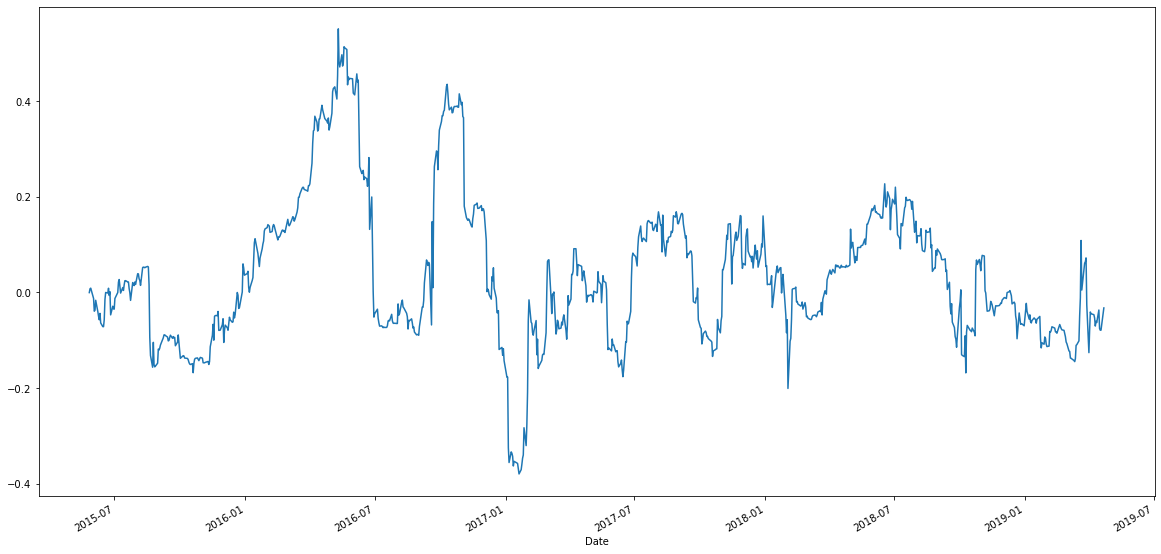

In [465]:
# Plot beta trend
rolling_covariance = portfolio['PAULSON & CO.INC. '].rolling(window=60).cov(portfolio['S&P500'])
rolling_variance = portfolio['S&P500'].rolling(window=60).var()
rolling60_beta=rolling_covariance/rolling_variance
rolling60_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

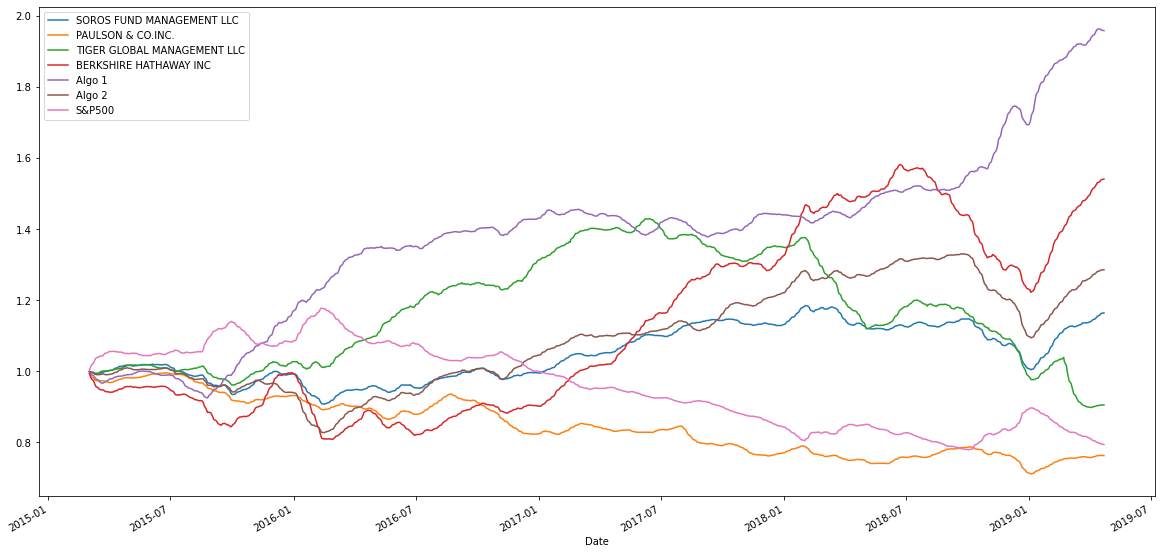

In [466]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = portfolio.ewm(span = 21,adjust = False).mean()
(1+portfolio_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [467]:
# Annualized Sharpe Ratios
portfolio_sharpe = portfolio.mean()*252/(portfolio.std()*np.sqrt(252))
portfolio_sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<AxesSubplot:>

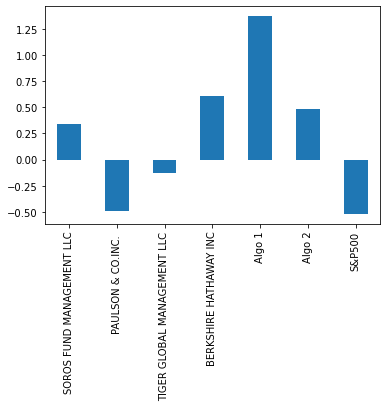

In [468]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

As clearly outlined in the above bar graph, both the Algo startegies outperform the S&P 500. As for the best startegy in the portfolio from a risk and return prospective will be Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [532]:
# Reading data from 1st stock (Amazon)
amazon = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\amzn.csv"
amazon= pd.read_csv(amazon,index_col="Date", infer_datetime_format=True, parse_dates=True)
amazon.rename(columns={"Adj Close":"amzn"},inplace=True)
amazon.head()

,amzn
Date,
2018-02-01,1189.010010
2018-03-01,1204.199951
2018-04-01,1209.589966
2018-05-01,1229.140015
2018-08-01,1246.869995


In [533]:
# Reading data from 2nd stock(Walmart)
walmart = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\wmt.csv"
walmart= pd.read_csv(walmart,index_col="Date", infer_datetime_format=True, parse_dates=True)
walmart.rename(columns={"Adj Close":"wmt"},inplace=True)
walmart.head()

,wmt
Date,
2018-05-01,93.190575
2018-08-01,94.568008
2018-09-01,93.432549
2018-10-01,92.762451
2018-11-01,93.088188


In [534]:
# Reading data from 3rd stock(NVIDIA Corporation)
nvda = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\nvda.csv"
nvda= pd.read_csv(nvda,index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda.rename(columns={"Adj Close":"nvda"},inplace=True)
nvda.head()


,nvda
Date,
2018-02-01,49.386852
2018-03-01,52.637188
2018-04-01,52.914654
2018-05-01,53.363060
2018-08-01,54.998142


In [535]:
# Combine all stocks in a single DataFrame
newportfolio=pd.concat([amazon,walmart,nvda],axis="columns",join="inner")
newportfolio.head()

,amzn,wmt,nvda
Date,,,
2018-05-01,1229.140015,93.190575,53.363060
2018-08-01,1246.869995,94.568008,54.998142
2018-09-01,1252.699951,93.432549,54.983288
2018-10-01,1254.329956,92.762451,55.414349
2018-11-01,1276.680054,93.088188,55.513447


In [536]:
# Reset Date index
newportfolio.index = newportfolio.index.normalize()
newportfolio.sort_index(inplace=True)
newportfolio.head()

,amzn,wmt,nvda
Date,,,
2018-01-02,1390.000000,98.207008,59.581329
2018-01-03,1493.449951,82.906380,57.563328
2018-01-05,1582.260010,81.837151,56.306499
2018-01-06,1641.540039,78.188438,63.901772
2018-01-08,1797.170044,83.134697,61.136059


In [474]:
# Reorganize portfolio data by having a column per symbol



In [537]:
# Calculate daily returns
dailyport=newportfolio.pct_change()
dailyport
# Drop NAs
dailyport.dropna(inplace=True)
# Display sample data
dailyport

,amzn,wmt,nvda
Date,,,
2018-01-03,0.074424,-0.155800,-0.033870
2018-01-05,0.059466,-0.012897,-0.021834
2018-01-06,0.037465,-0.044585,0.134892
2018-01-08,0.094807,0.063261,-0.043281
2018-01-10,0.115287,0.076023,0.174659
...,...,...,...
2019-11-01,-0.009455,-0.001264,0.024788
2019-11-02,-0.030209,0.014340,-0.015991
2019-11-03,0.050044,0.023701,0.101441


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [538]:
# Set weights
weights = [1/3, 1/3,1/3]

# Calculate portfolio return
portfolio_return=dailyport.dot(weights)
portfolio_return.dropna(inplace=True)

# Display sample data
portfolio_return.head()

Date
2018-01-03   -0.038415
2018-01-05    0.008245
2018-01-06    0.042591
2018-01-08    0.038262
2018-01-10    0.121990
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [550]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([portfolio_return,portfolio], axis = 0, join= "outer")
portfolio_returns.rename(columns = {0:"new_port"}, inplace = True)
portfolio_returns

,new_port,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P500,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,,
2018-01-03,-0.038415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.008245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-06,0.042591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,0.038262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,0.121990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,NaN,-0.004331,-0.004572,-0.010492,-0.001156,-0.000509,-0.001422,0.000398
2019-04-16,NaN,-0.006945,0.002899,0.000837,0.000388,0.002279,0.002699,-0.000831
2019-04-17,NaN,-0.010301,-0.005228,0.003222,-0.006467,-0.001577,-0.002897,-0.004409


In [552]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

,new_port,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P500,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [479]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [480]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [481]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [482]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [483]:
# Calculate Annualzied Sharpe Ratios


In [484]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!